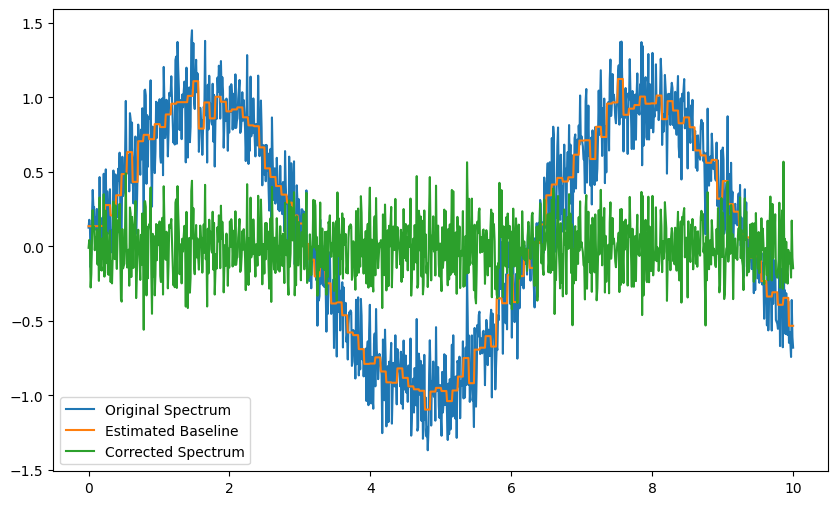

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def manual_wavelet_baseline_correction(x, y, level=3):
    """
    使用Haar小波变换实现光谱的基线校正
    Args:
        x (array): 光谱的x轴数据
        y (array): 光谱的y轴数据
        level (int): 小波变换的级别
    Returns:
        corrected_spectrum (array): 校正后的光谱
        baseline (array): 估计的基线
    """
    def next_power_of_2(n):
        """ 计算大于或等于n的最小的2的次方数 """
        return 1 if n == 0 else 2**(n - 1).bit_length()
    
    def haar_wavelet_transform(signal, levels):
        """多级一维Haar小波变换"""
        output = []
        current_signal = signal
        for _ in range(levels):
            half = len(current_signal) // 2
            approx = (current_signal[:2*half:2] + current_signal[1:2*half:2]) / 2
            detail = (current_signal[:2*half:2] - current_signal[1:2*half:2]) / 2
            output.append(detail)
            current_signal = approx
        output.append(current_signal)
        return output[::-1]

    def inverse_haar_wavelet_transform(transformed):
        """多级一维Haar小波逆变换"""
        signal = transformed[0]
        for detail in transformed[1:]:
            signal = np.repeat(signal, 2)
            signal[:len(detail)] += detail
            signal[len(detail):] -= detail
        return signal

    original_length = len(y)
    target_length = next_power_of_2(original_length)
    
    # 对y进行零填充
    padded_y = np.pad(y, (0, target_length - original_length), 'constant')
    
    # 对填充后的光谱数据进行Haar小波变换
    transformed = haar_wavelet_transform(padded_y, level)
    
    # 只保留近似系数，将细节系数置零
    for i in range(1, len(transformed)):
        transformed[i] = np.zeros_like(transformed[i])
    
    # 使用逆变换重建基线
    baseline = inverse_haar_wavelet_transform(transformed)[:original_length]
    
    # 进行基线校正
    corrected_spectrum = y - baseline
    return corrected_spectrum, baseline

# 示例数据
x = np.linspace(0, 10, 1023)
y = np.sin(x) + 0.2 * np.random.normal(size=1023)

corrected_spectrum, baseline = manual_wavelet_baseline_correction(x, y)

# 绘图展示结果
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Original Spectrum')
plt.plot(x, baseline, label='Estimated Baseline')
plt.plot(x, corrected_spectrum, label='Corrected Spectrum')
plt.legend()
plt.show()